In [3]:
import torch
import torchaudio
import torchaudio.transforms as T
import librosa
import fairseq

import matplotlib.pyplot as plt

/home/sensho/anaconda3/envs/speech_decoding/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
waveform, sample_rate = torchaudio.load(filepath="../data/OSR_us_000_0010_8k.wav")

In [45]:
waveform.shape

torch.Size([1, 268985])

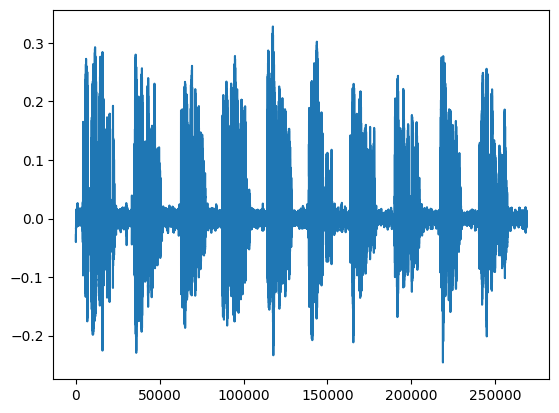

In [44]:
plt.plot(waveform.squeeze())

## Mel Spectrogram

In [13]:
mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=1024,
    n_mels=40,
    win_length=None,
    hop_length=512,
    window_fn=torch.hann_window,
    power=2.0,
)

spec = mel_spectrogram(waveform)

In [17]:
print(waveform.shape)
print(spec.shape)

torch.Size([1, 268985])
torch.Size([1, 40, 526])


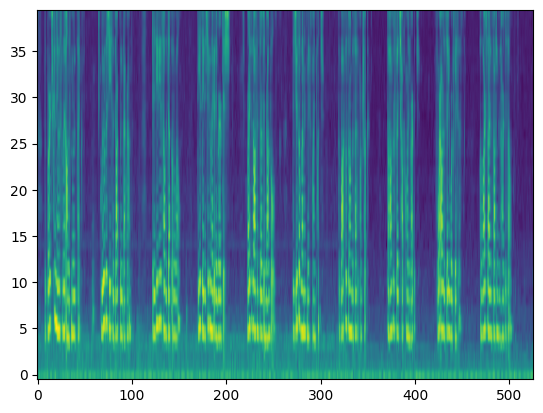

In [29]:
plt.imshow(librosa.power_to_db(spec[0]), origin="lower", aspect="auto")

## wav2vec 2.0

In [ ]:
cp_path = 'wav2vec_small.pt'
model, cfg, task = fairseq.checkpoint_utils.load_model_ensemble_and_task([cp_path])
model = model[0]
model.eval()

wav_input_16khz = torch.randn(1,10000)
z = model.feature_extractor(wav_input_16khz)
# c = model.feature_aggregator(z)

print(z.shape)

# Mat audio file (from Broderick2018)

In [1]:
import scipy.io
import numpy as np
import IPython.display
import matplotlib.pyplot as plt

In [36]:
audio = scipy.io.loadmat('../data/Broderick2018/Natural Speech/Stimuli/Envelopes/audio20_128Hz.mat')
audio = np.squeeze(audio['env'])
print(audio.shape)

(24200,)


In [32]:
scipy.io.wavfile.write('test.wav', 8000, (audio*3000).astype(np.int16))

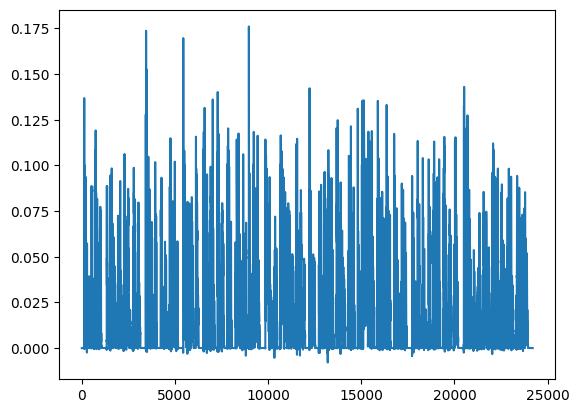

In [37]:
plt.plot(audio)

In [46]:
audio = torch.Tensor(audio)

In [48]:
audio = audio.unsqueeze(0)

In [49]:
torchaudio.save(filepath="test.wav", src=audio, sample_rate=8000)

# Mat EEG file (from Brennan2018)

In [27]:
import h5py

In [22]:
matfile = scipy.io.loadmat("../data/Brennan2018/S01.mat")["raw"][0,0]

In [23]:
sample = matfile["trial"][0,0]
print(sample.shape)

(62, 366525)


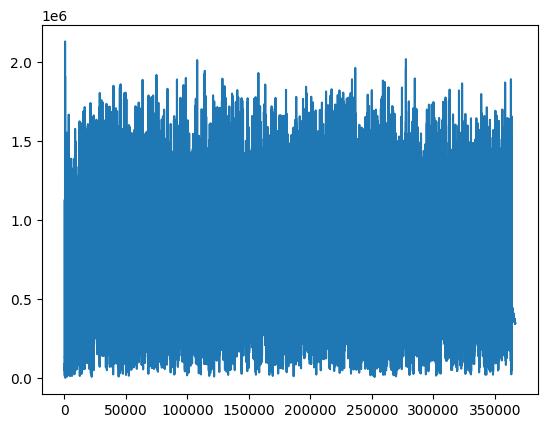

In [29]:
plt.plot(sample[-1])